In [1]:
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import math
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to C:\Users\chamandeep
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# EXRTRACTING DATA FROM THE TEXT FILES IN PYTHON USING OS MODULE

# -------------------------------------------------------------------------------------------------

# Header Remover Function
#### It works in quite complex way , it basically checks for  ':' in each line and header_zero is for the thing that from the beginning untill the lines have ':' they should not be included, else if ':' occurs in between the text that line should be included. 

In [2]:
def remove_headers(f):
    flag = 0
    headers_over = 0
    p = ""
    for x in f:
        if(len(x)==1):
            continue
            
        # this if-else sets the condition whether the particular line should be included in the text or not 
        if ':' in x and headers_over==0:
            flag = 1
        else:
            headers_over = 1
            flag = 0
            
        # this if check for the condition set by above if-else and add the lines to main body part of email 
        if flag==0:
            p+=x
    return p
                

# Load Email Data From Text Files

In [3]:
import os,sys

In [4]:
path = r"C:\Users\chamandeep singh\Desktop\MACHINE LEARNING\ML_PROJECTS\PROJECT_6(Naive bayes-text classification)\PROJECT-6(text classification)\20_newsgroups"
directory = os.listdir( path )
data = []
target = []
for i in directory:
    inner_path = path+"\\"+i
    inner_directory = os.listdir(inner_path)
    for j in inner_directory:
        inner_inner_path = inner_path+"\\"+j
        file = open(inner_inner_path,"r")
        header_free_file = remove_headers(file)
        data.append(header_free_file)
        target.append(i)

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(data,target,random_state = 1)
len(x_train),len(x_test),len(y_train),len(y_test)

(14997, 5000, 14997, 5000)

# SELF IMPLEMENTATION OF MULTINOMIAL NAIVE BAYES

# --------------------------------------------------------------------------------------

# Selecting Features For Training  Of Data

### ==> This Function Creates The List of Stop Words

In [6]:
sw = stopwords.words("english")
sw1 = [i.capitalize() for i in sw]
for j in sw1:
    sw.append(j)
#Few extra words/symbols which generally occur in the mails
temp = ["0","1","2","3","4","5","6","7","8","9","~","!","@","#","$","%","^","&","*","(","{",")","}","|",",",">","<","?",".",":","-","--","|>",">>","/","=","+","...",">|>",">|","//","_/","*/",">>>","/*","----",">---","||","#>","]","***","["]
for i in temp:
    sw.append(i)

### ==> This Function Returns the Dictionary Of All The Words In the Training Data

In [7]:
def column_maker(x_train):
    dic = {}
    for each_email in x_train:
        ls = each_email.split()
        for j in ls:
            if j not in sw:
                dic[j] = dic.get(j,0)+1
    return dic


### ==> Here the Features(Words) Are being Selected From the Dictionary Of Words

In [8]:
dictionary = column_maker(x_train)
features = []
count = 0
decreaing_order_dictionary =  sorted(dictionary, key=dictionary.get, reverse=True)

###### here we get the keys or words in the decreasig order of their values #####

for word in decreaing_order_dictionary:
    features.append(word)
    count+=1
    if count==3500:
        break
features = np.array(features)
features

array(['would', 'one', 'like', ..., 'Conference', 'Star', 'Philadelphia'],
      dtype='<U80')

# Graph For Selecting Appropriate Value of The Words in Features

<function matplotlib.pyplot.show(*args, **kw)>

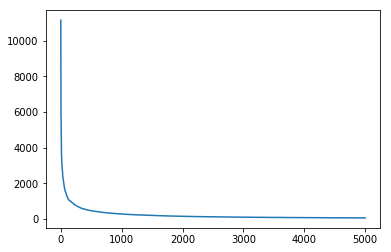

In [9]:
#graph of frequency words vs. no of words in decreaing order 
x_axis = [i for i in range(5000)]
y_axis = []
for i in range(5000):
    y_axis.append(dictionary[decreaing_order_dictionary[i]])  
plt.plot(x_axis,y_axis)
plt.show

# Making Table with Most Frequent Occuring 3500 words as columns and each row of table as email 
### each value of table depicts the no time particular word occured in the particular email

In [10]:
def table_maker(features,x_train):
    X = [] 
    for email in x_train:
        email = email.split()
        dic = Counter(email)
        temp = []
        for j in features:
            if j in dic:
                temp.append(dic[j])
            else:
                temp.append(0)
        X.append(temp)
    return X

In [11]:
email_data = table_maker(features,x_train)
pd.DataFrame(email_data)

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,4,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,2,0,1,1,3,3,0,...,0,1,0,0,0,0,0,0,0,0
3,4,2,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
email_data = np.array(email_data)
email_target = np.array(y_train)
email_data.shape,email_target.shape

((14997, 3500), (14997,))

# Fit Function Of Naive Bayes Implementation

### ==> This function returns the dictionary of count of words which we have selected in features


In [13]:
def fit(x,y,features):
    count = {}
    
    ### first of all we have to select the classes
    
    class_values = set(y)
    for current_class in class_values:
        count[current_class] = {}
        
        ### After selecting class we have to list out the rows in x and y belongs to that particcular class
        
        temp = (y == current_class)
        x_current_class = x[temp]
        y_current_class = y[temp]
        columns = 0
        for word in features:
            count[current_class][word] = x_current_class[:,columns].sum()
            columns+=1
        
        ### below we are calculating the total words in the particular class
        
        total = 0
        for i in features:
            total += count[current_class][i]
        count[current_class]["total_count"] = total
    return count

# Predict Function Of Naive Bayes Implementation

### ==> with help of below THREE function the CATEGORY of email is predicted  

In [14]:
### in this function we are given one text document as email and dictionary of words with their counts and the class to which
### it belongs and we will return the P(Y=yi | X=Xi)

def findSingleClassProb(email,count,Class):
    ans = 1
    pr_class = math.log(count[Class]["total_count"])
    email_words = email.split()
    ans = ans * pr_class
    for i in email_words:
        if i in count[Class]:
            a = len(count[Class].keys())
            pr_this_feature = math.log((count[Class][i]+ 1)/(a + count[Class]["total_count"]))
            ans = ans + pr_this_feature
    return ans

In [15]:
### in this function we are given email and dictionary of words with their counts and we will be going to return the best
### class to which it can belong

def predict_single(email,count):
    KEYS = count.keys()
    max_pr = float('-Inf')
    max_class = None
    for Class in KEYS:
        p = findSingleClassProb(email, count, Class)
        if p > max_pr:
            max_pr = p
            max_class = Class
    return max_class

In [16]:
### in this function we are given data to be trained and dictionary of words with their counts and we return the predicted 
### classes to which it can belong
def predict(x_test,count):
    output = []
    for each_email in x_test:
        output.append(predict_single(each_email,count))
    return output

### ==> Fitting on the data which we have converted in the tabular form above

In [17]:
count = fit(email_data,email_target,features)

### ==> Predicting int the x_test data with the help of dictionary we have created 

In [18]:
pred = predict(x_test,count)

### ==> CHECKING ACCURACY OF THE PREDICTED DATA

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
OUR_IMPLEMENTATION_ACCURACY_SCORE = accuracy_score(pred,y_test)
print(accuracy_score(pred,y_test))
print(classification_report(y_pred=pred, y_true=y_test))
print(confusion_matrix(y_pred=pred, y_true=y_test))

0.691
                          precision    recall  f1-score   support

             alt.atheism       0.54      0.68      0.60       261
           comp.graphics       0.46      0.60      0.52       248
 comp.os.ms-windows.misc       0.66      0.62      0.64       253
comp.sys.ibm.pc.hardware       0.56      0.58      0.57       260
   comp.sys.mac.hardware       0.68      0.67      0.67       266
          comp.windows.x       0.82      0.65      0.73       265
            misc.forsale       0.79      0.67      0.73       252
               rec.autos       0.67      0.76      0.71       223
         rec.motorcycles       0.82      0.84      0.83       293
      rec.sport.baseball       0.75      0.80      0.77       245
        rec.sport.hockey       0.88      0.76      0.81       247
               sci.crypt       0.88      0.77      0.82       248
         sci.electronics       0.62      0.67      0.65       239
                 sci.med       0.80      0.74      0.77       236
   

# ------------------Self Implementation Of Multinomial Naive Bayes Over----------------

# MULTINOMIAL NAIVE BAYES SKLEARN IMPLEMENTATION

In [20]:
from sklearn import naive_bayes

In [21]:
clf = naive_bayes.MultinomialNB()

In [22]:
clf.fit(email_data,email_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
email_data_y_test = table_maker(features,x_test)
pd.DataFrame(email_data_y_test)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y_pred = clf.predict(email_data_y_test)
y_pred

array(['talk.politics.mideast', 'rec.motorcycles', 'rec.sport.baseball',
       ..., 'comp.sys.mac.hardware', 'sci.crypt', 'rec.autos'],
      dtype='<U24')

In [25]:
SKLEARN_IMPLEMENTATION_ACCURACY_SCORE = accuracy_score(y_pred,y_test)
SKLEARN_IMPLEMENTATION_ACCURACY_SCORE

0.69679999999999997

# Comparing Results of our implementation of Naive Bayes with one in Sklearn

In [26]:
print("ACCURACY SCORE OF OUR IMPLEMENTATION :-",OUR_IMPLEMENTATION_ACCURACY_SCORE)
print("ACCURACY SCORE OF SKLEARN IMPLEMENTATION :-",SKLEARN_IMPLEMENTATION_ACCURACY_SCORE)

ACCURACY SCORE OF OUR IMPLEMENTATION :- 0.7002
ACCURACY SCORE OF SKLEARN IMPLEMENTATION :- 0.6968
